<a href="https://colab.research.google.com/github/13023077uhi/13023077_DataAnalytics/blob/main/Assignment_1_submission_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Part1

## Introduction

### Objective

The emergency services of New York City have outlined the need for a comprehensive analysis of the relationship between weather conditions and the number of traffic collisions that occur on any given day. To facilitate this, publicly available datasets hosted on **Google BigQuery** will be utilized. These datasets include detailed information on traffic collisions as well as weather conditions, providing a robust foundation for the analysis.

The project will involve the development of two predictive models: a linear regression model and a Deep Neural Network (DNN) regression model. Both models will leverage the historical data retrieved from BigQuery to accurately forecast the number of traffic collisions for specific days of the week. By integrating weather data into these predictions, the models aim to provide actionable insights

## Methodology

### Getting the data & SQL

[Link to BigQuery project for user 13023077](https://console.cloud.google.com/bigquery?project=uhi-project-435215&authuser=3&inv=1&invt=AbkjvQ&ws=!1m0)

To process and organize the data for analysis, a series of SQL queries is written to systematically create views, simplifying the data manipulation and retrieval process. The first step involves consolidating all the **weather data** into a single unified view. This view contains comprehensive weather information spanning the years 2012 to 2024, specifically for the "NY CITY CENTRAL PARK Climatological Data Station." This ensures a consistent and centralized dataset for the specified location over the given time period.

The weather data is originally stored in separate tables, with each table representing data for an individual year. Instead of writing repetitive UNION statements to combine these yearly tables into one cohesive dataset, a **wildcard feature is employed in the SQL** query. The wildcard allowed for the dynamic selection of all relevant tables in a single operation. This approach significantly reduces the complexity and redundancy of the SQL script, making it more maintainable and scalable.

![SQL Screenshot Weather](https://raw.githubusercontent.com/13023077uhi/13023077_DataAnalytics/main/SQL-Screenshot-Weather.jpg)


The next step involves creating another view to process the collision data. In this view, the **collision data is grouped** by date to aggregate the number of collisions occurring on each date. This ensures that the data is summarized at the daily level, providing a clear picture of the frequency of traffic collisions over time. Additionally, the view includes columns that add contextual information to each date. The day of the week (e.g., Monday, Tuesday) and the corresponding day name are appended to the data.


![SQL Screenshot collision count](https://raw.githubusercontent.com/13023077uhi/13023077_DataAnalytics/main/SQL-Screenshot-Collision_count.jpg)


The final step involves **joining the weather data and the collision data** into a single comprehensive view. This combined view links the daily number of collisions with the corresponding weather conditions for each specific date. By integrating these two datasets, the view provides a detailed account of how weather conditions may influence traffic collisions. The join operation is performed using the date as the common key between the two datasets

![SQL Screenshot collision collated](https://raw.githubusercontent.com/13023077uhi/13023077_DataAnalytics/main/SQL-Screenshot-collated_collision_data.jpg)


Here is a screenshot of the final combined weather & collisions dataset as a select statement.

![SQL Screenshot select final](https://raw.githubusercontent.com/13023077uhi/13023077_DataAnalytics/main/SQL-Screenshot-SelectAllData.jpg)


### Github repository

The above collisions collated dataset is exported and uploaded to Github to be used in further analyses. [Link to Github repository](https://github.com/13023077uhi/13023077_DataAnalytics)

### Load data in Colab with a R kernel

In [1]:
# Install additional libraries if not already installed
# ignore the warning below
# It may take approx 50 seconds when run first time.
suppressWarnings(
lapply(c("GGally", "corrplot","patchwork"),
       function(x) if(!require(x, character.only = TRUE)) install.packages(x))
)

Loading required package: GGally

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: corrplot

corrplot 0.95 loaded

Loading required package: patchwork



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

In [2]:
# Load all libraries to be used in this analyses
# ignore the warning below
suppressWarnings({

library(tidyverse) # Data manipulation/visualization
library(GGally)    # Pairplot
library(corrplot)  # Correlation
library(patchwork) # Stitch graphs togather
})

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


CSV file containing collated collision data from a GitHub URL into a data frame in R. The day_name column is converted into a factor with the days of the week ordered from Monday to Sunday, ensuring proper chronological alignment.

In [3]:
# Read collisions data from github
collision_collated <- read.csv("https://raw.githubusercontent.com/13023077uhi/13023077_DataAnalytics/main/collated_collision_data.csv", stringsAsFactors = TRUE)

# Order day of the week
day_order1 <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
collision_collated <- collision_collated %>%
  mutate(day_name = factor(day_name, levels = day_order1)) %>%
# also addong month name to be used later
  mutate(motxt = month.abb[mo]) %>%
  relocate(motxt, .after = 5)



In [4]:
# structure of our dataset
glimpse(collision_collated)

Rows: 4,455
Columns: 24
$ rundate         <fct> 2024-09-15T12:56:06.413578, 2024-09-15T12:56:06.413578…
$ day             <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ day_name        <fct> Monday, Monday, Monday, Monday, Monday, Monday, Monday…
$ year            <int> 2022, 2022, 2024, 2024, 2024, 2024, 2024, 2024, 2023, …
$ mo              <int> 8, 9, 3, 7, 2, 7, 5, 1, 7, 1, 1, 6, 5, 8, 9, 8, 3, 10,…
$ motxt           <chr> "Aug", "Sep", "Mar", "Jul", "Feb", "Jul", "May", "Jan"…
$ da              <int> 15, 5, 11, 1, 12, 8, 13, 1, 10, 16, 9, 6, 27, 19, 2, 1…
$ collisions_date <fct> 2022-08-15, 2022-09-05, 2024-03-11, 2024-07-01, 2024-0…
$ temp            <dbl> 69.7, 70.2, 40.0, 69.5, 38.2, 72.0, 52.1, 36.9, 65.6, …
$ dewp            <dbl> 62.5, 62.0, 27.3, 64.7, 33.0, 71.5, 46.8, 26.6, 65.1, …
$ slp             <dbl> 1016.7, 1020.6, 994.0, 1012.9, 1011.4, 1016.6, 1016.8,…
$ visib           <dbl> 10.0, 10.0, 10.0, 10.0, 10.0, 4.0, 10.0, 10.0, 3.2, 7.…
$ wdsp          

In [5]:
# first few rows of our dataset
head(collision_collated)

,rundate,day,day_name,year,mo,motxt,da,collisions_date,temp,dewp,⋯,gust,max,min,prcp,sndp,fog,stn,wban,station_name,NUM_COLLISIONS
,<fct>,<int>,<fct>,<int>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<int>
1,2024-09-15T12:56:06.413578,1,Monday,2022,8,Aug,15,2022-08-15,69.7,62.5,⋯,999.9,79.0,59.0,0.00,999.9,0,725060,14756,NANTUCKET MEMORIAL AIRPORT,241
2,2024-09-15T12:56:06.413578,1,Monday,2022,9,Sep,5,2022-09-05,70.2,62.0,⋯,999.9,77.0,57.0,0.00,999.9,0,725060,14756,NANTUCKET MEMORIAL AIRPORT,254
3,2024-09-15T12:56:06.413578,1,Monday,2024,3,Mar,11,2024-03-11,40.0,27.3,⋯,39.0,51.1,32.0,0.44,999.9,0,725060,14756,NANTUCKET MEMORIAL AIRPORT,261
4,2024-09-15T12:56:06.413578,1,Monday,2024,7,Jul,1,2024-07-01,69.5,64.7,⋯,34.0,73.0,66.0,0.65,999.9,0,725060,14756,NANTUCKET MEMORIAL AIRPORT,247
5,2024-09-15T12:56:06.413578,1,Monday,2024,2,Feb,12,2024-02-12,38.2,33.0,⋯,999.9,48.0,33.1,0.00,999.9,0,725060,14756,NANTUCKET MEMORIAL AIRPORT,248
6,2024-09-15T12:56:06.413578,1,Monday,2024,7,Jul,8,2024-07-08,72.0,71.5,⋯,999.9,78.1,68.0,0.00,999.9,1,725060,14756,NANTUCKET MEMORIAL AIRPORT,238


### Handling missing data

The missing data in the dataset is handled by first checking for standard NA values and then counting placeholder values that indicate missing data for specific columns (e.g., 9999.9 for dewp and 99.99 for prcp as explained in dataset guidance). A custom function is used to calculate the count of such placeholder values for each relevant column.
<br><br>
**For columns with manageable missing data, these placeholder values are replaced with the median** of the valid values in the column, as the median is robust to outliers and provides a reliable central tendency for imputation. Columns with excessive missing data (gust and sndp) are left unaltered.

In [6]:
# Check for missing values
sum(is.na(collision_collated)) # There are no empty data
colSums(is.na(collision_collated))

[1] 0

rundate             day        day_name            year              mo 
              0               0               0               0               0 
          motxt              da collisions_date            temp            dewp 
              0               0               0               0               0 
            slp           visib            wdsp           mxpsd            gust 
              0               0               0               0               0 
            max             min            prcp            sndp             fog 
              0               0               0               0               0 
            stn            wban    station_name  NUM_COLLISIONS 
              0               0               0               0

In [7]:
# Count missing values
missing_values <- list(
  dewp = 9999.9,
  mxpsd = 999.9,
  gust = 999.9,
  prcp = 99.99,
  sndp = 999.9
)

# Function to count missing values based on custom missing indicators
count_missing <- function(df, missing_vals) {
  sapply(names(missing_vals), function(col) {
    sum(df[[col]] == missing_vals[[col]], na.rm = TRUE)
  })
}

# Count missing values for each column
missing_counts <- count_missing(collision_collated, missing_values)
missing_counts

dewp mxpsd  gust  prcp  sndp 
    1    32  1709    39  4454

In [8]:
# Replace missing values with the median
collision_collated <- collision_collated %>%
  mutate(
    dewp = ifelse(dewp == 9999.9, median(dewp[dewp != 9999.9], na.rm = TRUE), dewp),
    mxpsd = ifelse(mxpsd == 999.9, median(mxpsd[mxpsd != 999.9], na.rm = TRUE), mxpsd),
    prcp = ifelse(prcp == 99.99, median(prcp[prcp != 99.99], na.rm = TRUE), prcp)
    #gust = too many missing values
    #sndp = too many missing values
  )

### Exploratory data analysis

In [9]:
# Veryfying years in our dataset
collision_collated$year %>% unique() %>% sort()

[1] 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024

The NUM_COLLISIONS variable shows a wide range from **94 to 1161** collisions per day, with a median of 511, indicating significant variability that may correlate with factors like weather or the day of the week. Temperature (temp) ranges from 5.8°F to 86.7°F, with a median of 52.7°F, suggesting the dataset covers diverse seasonal conditions. Dew point (dewp) ranges from -10.4°F to 76.3°F, with a median of 46°F, reflecting varying levels of humidity.

In [10]:
# see comment above
summary(collision_collated)

                       rundate          day         day_name        year     
 2024-09-15T12:56:06.413578:4455   Min.   :1   Monday   :637   Min.   :2012  
                                   1st Qu.:2   Tuesday  :637   1st Qu.:2015  
                                   Median :4   Wednesday:636   Median :2018  
                                   Mean   :4   Thursday :636   Mean   :2018  
                                   3rd Qu.:6   Friday   :636   3rd Qu.:2021  
                                   Max.   :7   Saturday :636   Max.   :2024  
                                               Sunday   :637                 
       mo            motxt                 da          collisions_date
 Min.   : 1.000   Length:4455        Min.   : 1.00   2012-07-01:   1  
 1st Qu.: 4.000   Class :character   1st Qu.: 8.00   2012-07-02:   1  
 Median : 7.000   Mode  :character   Median :16.00   2012-07-03:   1  
 Mean   : 6.542                      Mean   :15.71   2012-07-04:   1  
 3rd Qu.: 9.000      

The run chart below depicts the number of traffic collisions over time, categorized by year. From 2012 to early 2004, there is a relatively consistent range in daily collision numbers. However, there is a sharp and significant drop in collision counts starting in 2020, which aligns with the onset of the COVID-19 pandemic. This decrease is likely attributable to reduced traffic volumes during lockdowns and widespread changes in mobility patterns. Post-COVID, the data suggests that **collision numbers have not returned to pre-pandemic levels** and instead continue to show a gradual downward trend.

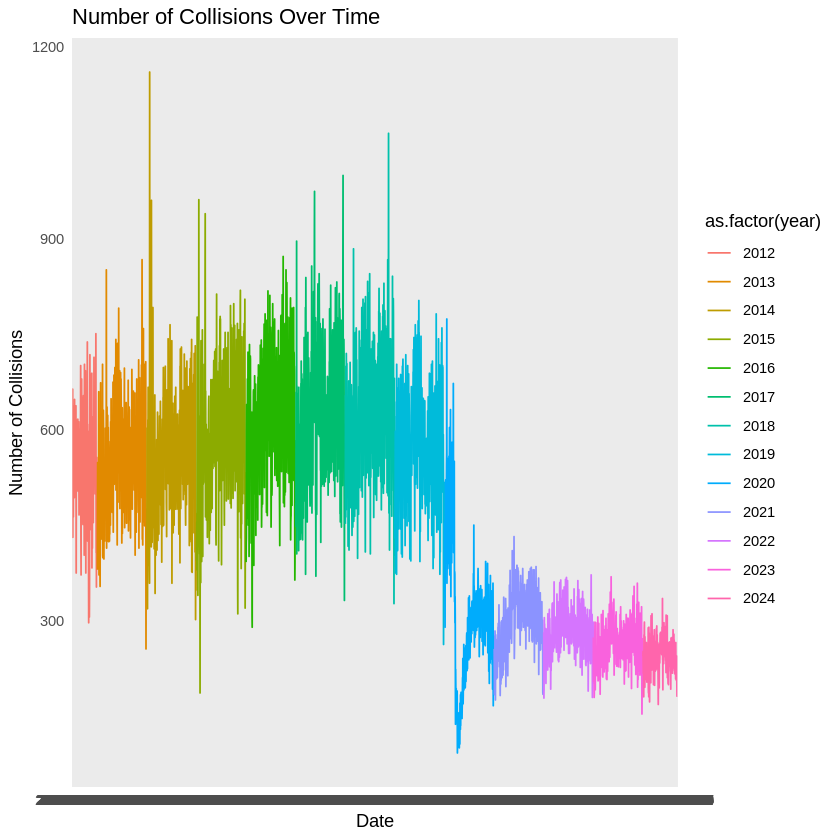

In [11]:
# Run chart: Collisions per day
# see comments above
ggplot(collision_collated, aes(x = collisions_date, y = NUM_COLLISIONS, col = as.factor(year),group = year)) +
  geom_line() +
  labs(title = "Number of Collisions Over Time", x = "Date", y = "Number of Collisions") +
  theme_minimal()

### Dealing with outliers

There are **outliers** in the NUM_COLLISIONS data that represent extreme values deviating significantly from the typical range. We decided to **exclude these outliers** to improve the consistency of the dataset, as they can distort statistical summaries, obscure general trends, and negatively affect the performance of predictive models. However, removing outliers can potentially result in the loss of important information, as they may reflect rare but meaningful events, such as severe weather or major accidents, which could provide unique insights.

To remove the outliers, the **Interquartile Range (IQR) method** was applied separately for each year. This involves calculating the lower and upper bounds as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively. Data points falling outside these bounds were filtered out.

In [12]:
# Remove outliers for each year separately
# lower_bound <- Q1 - 1.5 * IQR
# upper_bound <- Q3 + 1.5 * IQR
collision_collated <- collision_collated %>%
  group_by(year) %>%
  filter(
    NUM_COLLISIONS >= quantile(NUM_COLLISIONS, 0.25, na.rm = TRUE) - 1.5 * IQR(NUM_COLLISIONS, na.rm = TRUE) &
    NUM_COLLISIONS <= quantile(NUM_COLLISIONS, 0.75, na.rm = TRUE) + 1.5 * IQR(NUM_COLLISIONS, na.rm = TRUE)
  ) %>%
  ungroup()

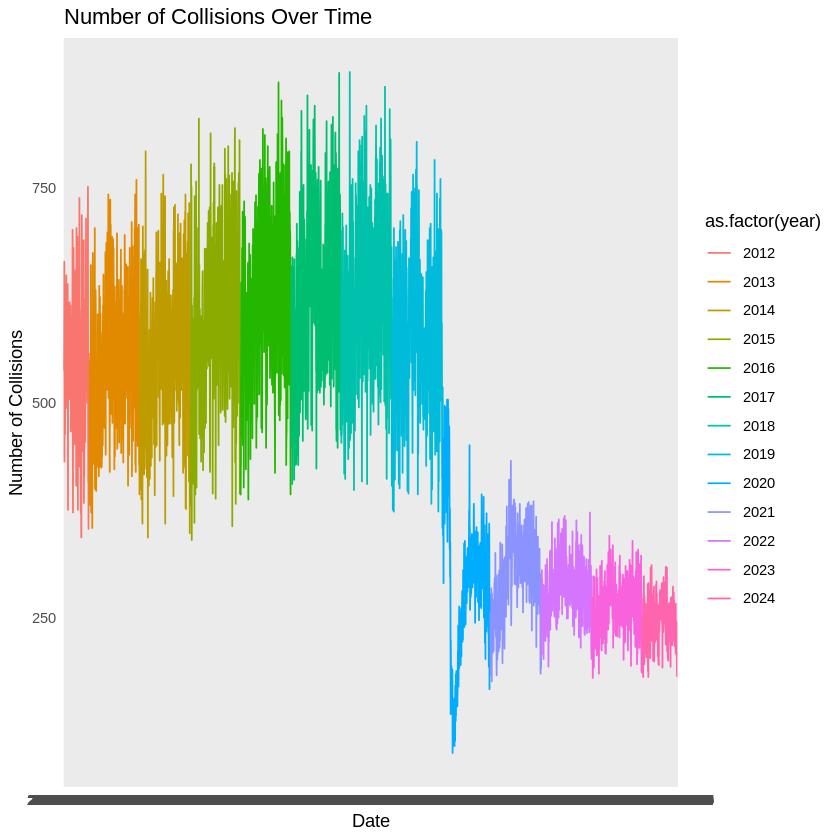

In [13]:
# Run chart: Collisions per day (With outliers removed)
ggplot(collision_collated, aes(x = collisions_date, y = NUM_COLLISIONS, col = as.factor(year),group = year)) +
  geom_line() +
  labs(title = "Number of Collisions Over Time", x = "Date", y = "Number of Collisions") +
  theme_minimal()

### Shape of the data

The histogram exhibits a bimodal distribution, with two distinct peaks around 300 and 600 collisions. This bimodality can be attributed to the differences in collision frequencies pre-COVID and post-COVID. The higher peak near 600 collisions likely represents pre-pandemic data, when traffic volumes and collision rates were higher, while the lower peak around 300 collisions reflects the reduced traffic and collision rates observed during and after the pandemic. The red normal distribution curve does not accurately represent the data, highlighting the impact of COVID-19 as a significant factor that disrupted the usual collision patterns.

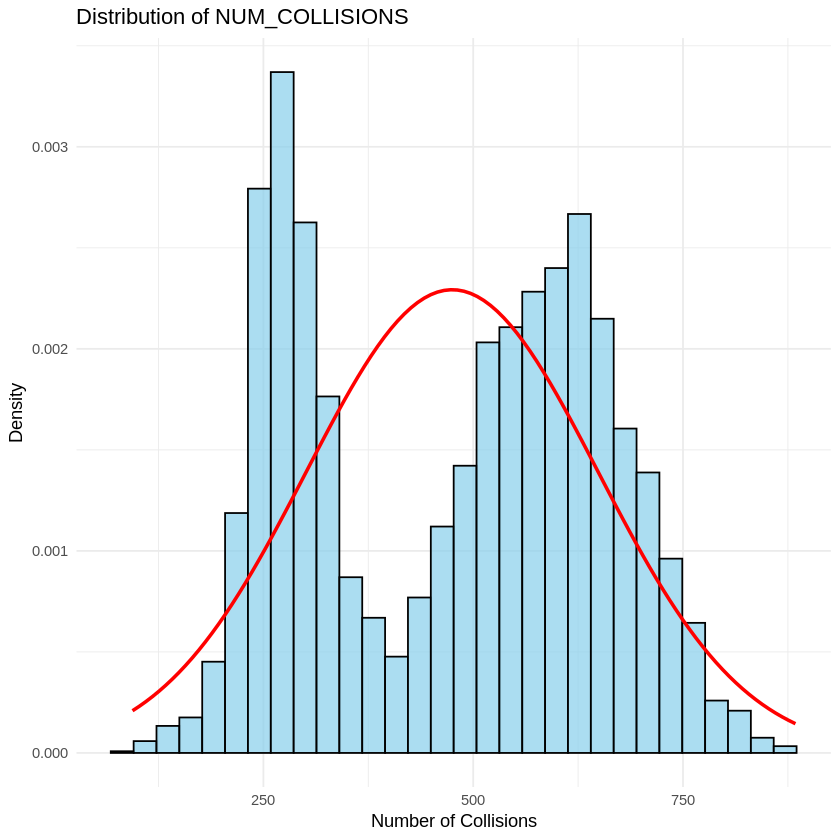

In [14]:
# See comment above
# histogram shows the distribution of the NUM_COLLISIONS
ggplot(collision_collated, aes(x = NUM_COLLISIONS)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  stat_function(fun = dnorm,
       args = list(mean = mean(collision_collated$NUM_COLLISIONS, na.rm = TRUE),
       sd = sd(collision_collated$NUM_COLLISIONS, na.rm = TRUE)),
       color = "red", linewidth = 1) +
  labs(title = "Distribution of NUM_COLLISIONS", x = "Number of Collisions", y = "Density") +
  theme_minimal()

### Seasonal variation

The line chart shows, collision counts generally peak in the summer months (June to August), reflecting increased activity during these periods, and decline slightly during the winter months (December to February).

Post-COVID years (2020 onward) show a substantial reduction in collision counts across all months, with 2020 exhibiting a sharp drop during the mid-year lockdown period. This trend continues with relatively lower collision totals in 2021 and subsequent years. 2012 & 2024 does not have complete years data.

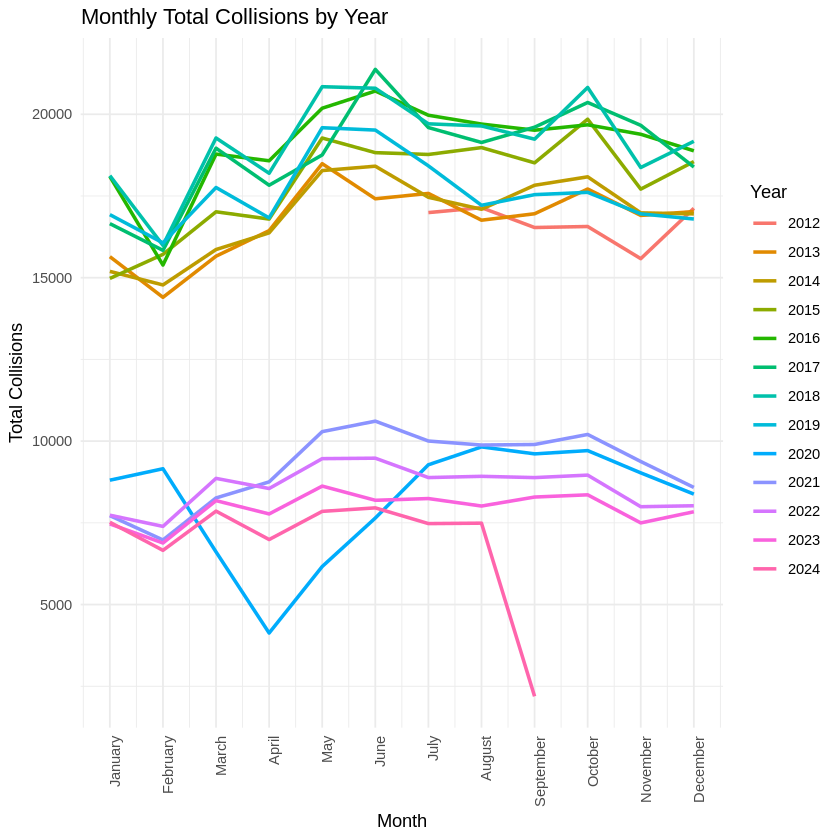

In [15]:
# Seasonal variation by year and month - Line chart
collision_collated %>%
  group_by(year, mo) %>%
  summarise(total_collisions = sum(NUM_COLLISIONS, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = mo, y = total_collisions, color = as.factor(year), group = year)) +
  geom_line(linewidth = 1) +
   #facet_wrap(~ year, ncol = 1) +
  scale_x_continuous(breaks = 1:12, labels = month.name) +
  labs(title = "Monthly Total Collisions by Year", x = "Month", y = "Total Collisions", color = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


The data for **2012 and 2024 is removed** due to incompleteness, as these years do not have collision data spanning the full 12 months, which could bias the analysis. Similarly, **data from 2020 is excluded** because of the unprecedented impact of the COVID-19 pandemic, which caused significant disruptions to normal traffic patterns and introduced anomalies that are not representative of typical seasonal trends.

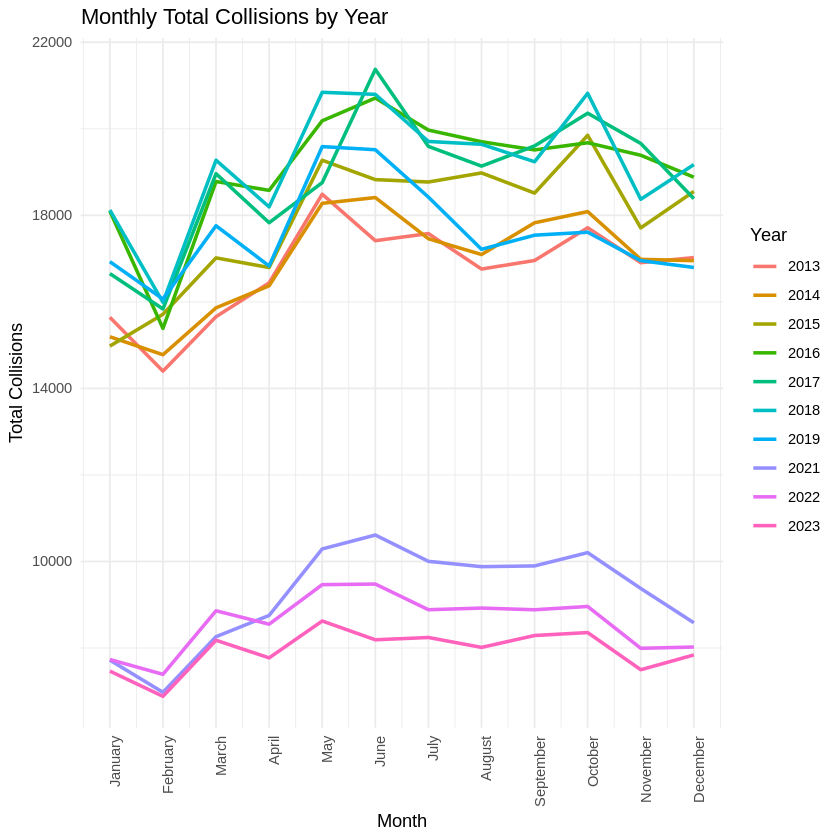

In [16]:
# Remove year 2012m 2020, 2024
collision_collated <- collision_collated %>%
  filter(!year %in% c(2012, 2020, 2024))

collision_collated %>%
  group_by(year, mo) %>%
  summarise(total_collisions = sum(NUM_COLLISIONS, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = mo, y = total_collisions, color = as.factor(year), group = year)) +
  geom_line(linewidth = 1) +  # Updated to linewidth to avoid deprecated warning
  scale_x_continuous(breaks = 1:12, labels = month.name) +
  labs(title = "Monthly Total Collisions by Year", x = "Month", y = "Total Collisions", color = "Year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Normalisation of NUM_COLLISIONS





The normalization of NUM_COLLISIONS using the formula **Normalized Value=
(x - xmin)/(xmax - xmin)**
scales the data within each year to a range of 0 to 1, with the minimum value set to 0 and the maximum to 1. This method ensures comparability across years, removing scale bias caused by variations in collision counts between years. It preserves the relative distribution of values within each year while creating a uniform scale, making it ideal for analyzing seasonal patterns and trends.

In [17]:
# Normalisation of NUM_COLLISIONS
# See comments above
collision_collated <- collision_collated %>%
  group_by(year) %>%
  mutate(
    NUM_COLLISIONS_max_year = max(NUM_COLLISIONS),
    NUM_COLLISIONS_min_year = min(NUM_COLLISIONS),
    NUM_COLLISIONS_norm = (NUM_COLLISIONS - min(NUM_COLLISIONS, na.rm = TRUE)) /
                          (max(NUM_COLLISIONS, na.rm = TRUE) - min(NUM_COLLISIONS, na.rm = TRUE))
  ) %>%
  ungroup()

head(collision_collated) %>% select (year,NUM_COLLISIONS,NUM_COLLISIONS_max_year, NUM_COLLISIONS_min_year, NUM_COLLISIONS_norm)


year,NUM_COLLISIONS,NUM_COLLISIONS_max_year,NUM_COLLISIONS_min_year,NUM_COLLISIONS_norm
<int>,<int>,<int>,<int>,<dbl>
2022,241,373,194,0.2625698
2022,254,373,194,0.3351955
2023,264,346,181,0.5030303
2023,217,346,181,0.2181818
2023,242,346,181,0.3696970
2022,311,373,194,0.6536313


### Separating Pre-COVID and post-COVID

Pre-COVID and post-COVID data exhibit significant differences due to the drastic changes in traffic patterns and mobility behaviors brought about by the pandemic. To account for these differences, the data is split into two distinct parts: pre-COVID and post-COVID. This separation will allow for a more focused analysis of each period, as combining them could obscure important trends and insights unique to each timeframe.

In [18]:
# Split the data
# Create the first dataframe for dates up to "2019-12-01"
collision_collated_precovid <- collision_collated %>%
  filter(as.Date(collisions_date) <= as.Date("2019-12-01"))

# Create the second dataframe for dates from "2020-08-01" onwards
collision_collated_postcovid <- collision_collated %>%
  filter(as.Date(collisions_date) >= as.Date("2020-08-01"))

#head(collision_collated_Precovid)
#head(collision_collated_postcovid)

### Pre-COVID and post-COVID trend & shape based on NUM_COLLISIONS

The visualizations reveal differences in the shape of the distribution for NUM_COLLISIONS before and after COVID-19. Pre-COVID, the distribution is near-normal with a wider spread, centered around 600 collisions, and extends across a broader range (approximately 400 to 900). Post-COVID, the distribution also appears near-normal but with a much tighter spread, centered around 300 collisions, and confined to a narrower range (200 to 400). The pre-COVID shape reflects greater variability and higher collision frequencies, while the post-COVID shape indicates reduced and more consistent collision levels.

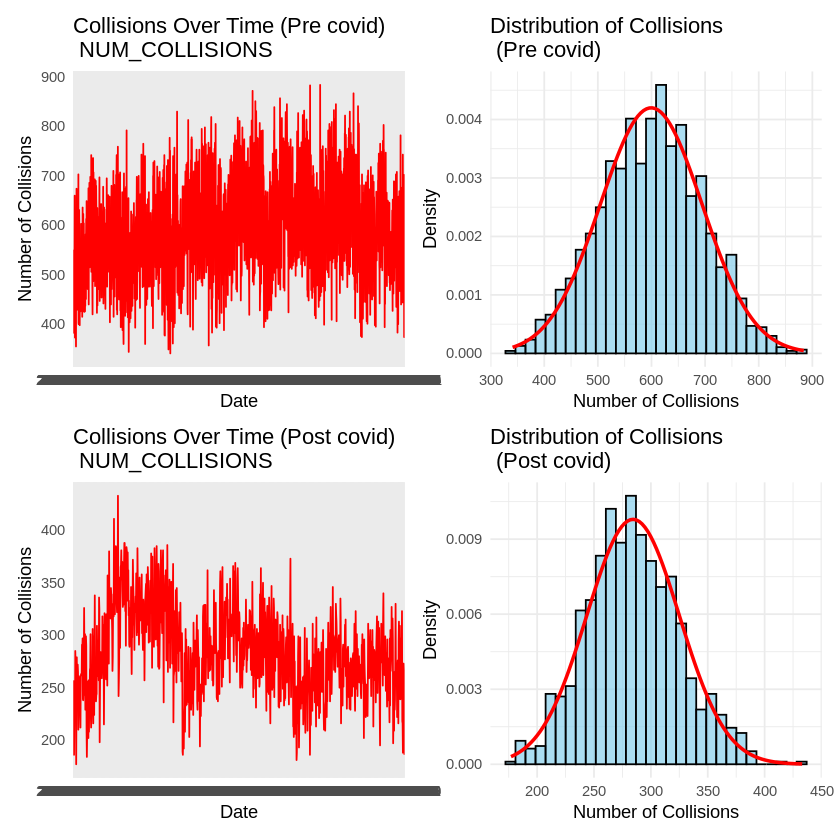

In [19]:
# Using NUM_COLLISIONS
line_precovid <- ggplot(collision_collated_precovid, aes(x = collisions_date, y = NUM_COLLISIONS, group = 1)) +
  geom_line(color = "red") +
  labs(title = "Collisions Over Time (Pre covid) \n NUM_COLLISIONS" , x = "Date", y = "Number of Collisions") +
  theme_minimal()

line_postcovid <- ggplot(collision_collated_postcovid, aes(x = collisions_date, y = NUM_COLLISIONS, group = 1)) +
  geom_line(color = "red") +
  labs(title = "Collisions Over Time (Post covid) \n NUM_COLLISIONS", x = "Date", y = "Number of Collisions") +
  theme_minimal()

hist_precovid <- ggplot(collision_collated_precovid, aes(x = NUM_COLLISIONS)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  stat_function(fun = dnorm,
       args = list(mean = mean(collision_collated_precovid$NUM_COLLISIONS, na.rm = TRUE),
       sd = sd(collision_collated_precovid$NUM_COLLISIONS, na.rm = TRUE)),
       color = "red", linewidth = 1) +
  labs(title = "Distribution of Collisions \n (Pre covid)", x = "Number of Collisions", y = "Density") +
  theme_minimal()

hist_postcovid <- ggplot(collision_collated_postcovid, aes(x = NUM_COLLISIONS)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  stat_function(fun = dnorm,
       args = list(mean = mean(collision_collated_postcovid$NUM_COLLISIONS, na.rm = TRUE),
       sd = sd(collision_collated_postcovid$NUM_COLLISIONS, na.rm = TRUE)),
       color = "red", linewidth = 1) +
  labs(title = "Distribution of Collisions \n (Post covid)", x = "Number of Collisions", y = "Density") +
  theme_minimal()

# Combine the two plots using patchwork
(line_precovid + hist_precovid) / (line_postcovid +   hist_postcovid)

### Pre-COVID and post-COVID trend & shape based on NUM_COLLISIONS_norm (normalized)


These charts again repeated but this time using the **normalized values of NUM_COLLISIONS**, reveal comparable trends and distributions for the pre-COVID and post-COVID periods. The pre-COVID line chart shows higher variability in daily collision counts, with normalized values fluctuating across the full range (0 to 1), while the post-COVID chart reflects a consistent reduction in collisions with slightly lower variability. The histograms show that both distributions are centered around 0.5, but the pre-COVID data exhibits a broader spread, indicating greater day-to-day variation.

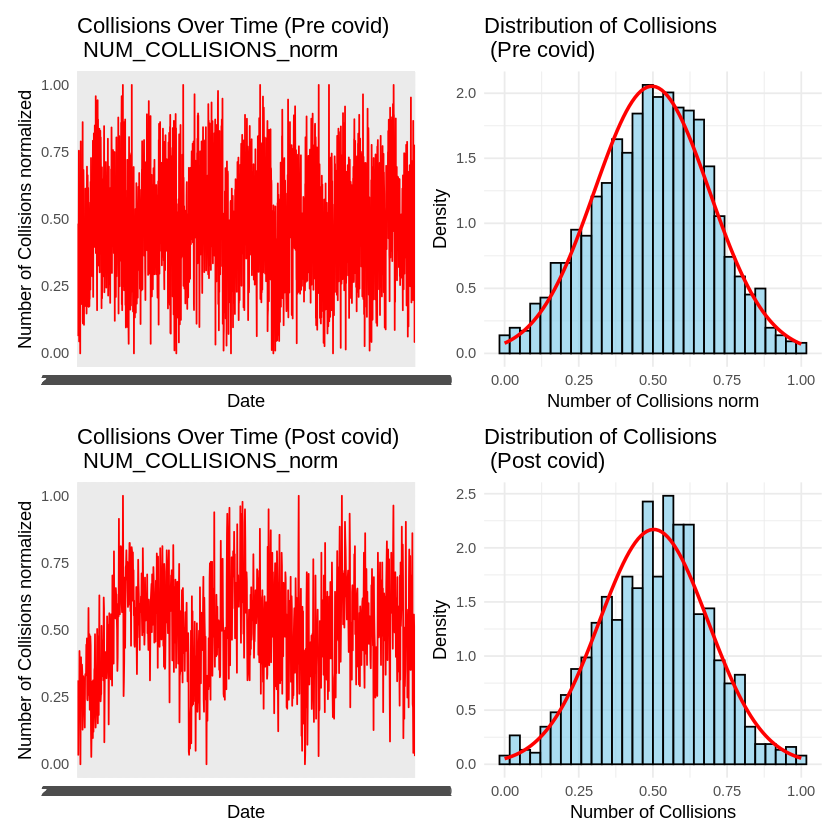

In [20]:
# Using NUM_COLLISIONS_norm
line_precovid <- ggplot(collision_collated_precovid, aes(x = collisions_date, y = NUM_COLLISIONS_norm, group = 1)) +
  geom_line(color = "red") +
  labs(title = "Collisions Over Time (Pre covid) \n NUM_COLLISIONS_norm", x = "Date", y = "Number of Collisions normalized") +
  theme_minimal()

line_postcovid <- ggplot(collision_collated_postcovid, aes(x = collisions_date, y = NUM_COLLISIONS_norm, group = 1)) +
  geom_line(color = "red") +
  labs(title = "Collisions Over Time (Post covid) \n NUM_COLLISIONS_norm", x = "Date", y = "Number of Collisions normalized") +
  theme_minimal()

hist_precovid <- ggplot(collision_collated_precovid, aes(x = NUM_COLLISIONS_norm)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  stat_function(fun = dnorm,
       args = list(mean = mean(collision_collated_precovid$NUM_COLLISIONS_norm, na.rm = TRUE),
       sd = sd(collision_collated_precovid$NUM_COLLISIONS_norm, na.rm = TRUE)),
       color = "red", linewidth = 1) +
  labs(title = "Distribution of Collisions \n (Pre covid)", x = "Number of Collisions norm", y = "Density") +
  theme_minimal()

hist_postcovid <- ggplot(collision_collated_postcovid, aes(x = NUM_COLLISIONS_norm)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  stat_function(fun = dnorm,
       args = list(mean = mean(collision_collated_postcovid$NUM_COLLISIONS_norm, na.rm = TRUE),
       sd = sd(collision_collated_postcovid$NUM_COLLISIONS_norm, na.rm = TRUE)),
       color = "red", linewidth = 1) +
  labs(title = "Distribution of Collisions \n (Post covid)", x = "Number of Collisions", y = "Density") +
  theme_minimal()

# Combine the two plots using patchwork
(line_precovid + hist_precovid) / (line_postcovid +   hist_postcovid)

### NUM_COLLISIONS Vs NUM_COLLISIONS_norm

The two graphs differ in their overall appearance due to the impact of scaling. The raw NUM_COLLISIONS graph has a more pronounced curve, as the absolute scale (ranging from 400 to 900) exaggerates the spikes and dips, making daily fluctuations appear more dramatic. In contrast, the normalized NUM_COLLISIONS_norm graph appears straighter because all values are scaled to the same range (0 to 1), reducing the visual impact of extreme deviations. While both graphs show similar patterns of variability, the raw data emphasizes the magnitude of changes, whereas normalization highlights relative trends, making the fluctuations appear smoother and more uniform.

Normalization benefits analysis by eliminating scale bias, making data comparable across different years and focusing on relative trends rather than absolute values.

### Influence of Day of the week

The boxplots highlight distinct day-based trends in traffic collisions. Pre-COVID, collisions were notably higher on weekdays, with a peak on Fridays, and significantly lower on weekends, particularly Sundays, reflecting typical commuting patterns. There was also greater variability in weekday collisions compared to weekends. Post-COVID, this distinction between weekdays and weekends is much less pronounced.

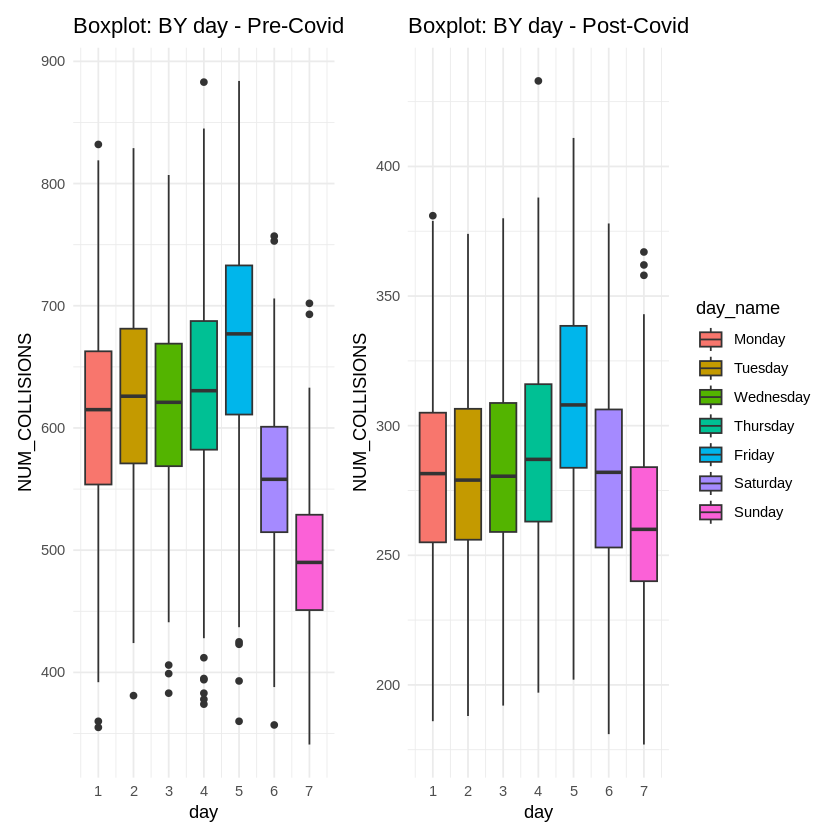

In [21]:

# Create the Pre-Covid plot with ordered days
plot_precovid <- collision_collated_precovid %>%
 # mutate(day_name = factor(day_name, levels = day_order)) %>%
  ggplot(aes(x = day, y = NUM_COLLISIONS, fill = day_name)) +
  geom_boxplot() +
  labs(title = "Boxplot: BY day - Pre-Covid") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(1, 7, 1))+
  theme(legend.position = "none") #+
  #theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #scale_fill_discrete(drop = FALSE)

# Create the Post-Covid plot with ordered days
plot_postcovid <- collision_collated_postcovid %>%
  #mutate(day_name = factor(day_name, levels = day_order)) %>%
  ggplot(aes(x = day, y = NUM_COLLISIONS, fill = day_name)) +
  geom_boxplot() +
  labs(title = "Boxplot: BY day - Post-Covid") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(1, 7, 1))
  #theme(legend.position = "none") +
  #theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Combine the two plots using patchwork
plot_precovid + plot_postcovid

### Re-arranging Day of the week

Reordering the days of the week, with Sunday as day 1 and Saturday as day 2, reveals a possible relationship in the data. By rearranging the order to place weekends at the beginning, followed by weekdays in sequence (Monday to Friday), the boxplots show a more systematic progression of collision counts. This reordering helped smooth out the transition from lower weekend collisions to higher weekday collisions, suggesting a potential linear or structured relationship between the day of the week and the number of collisions.

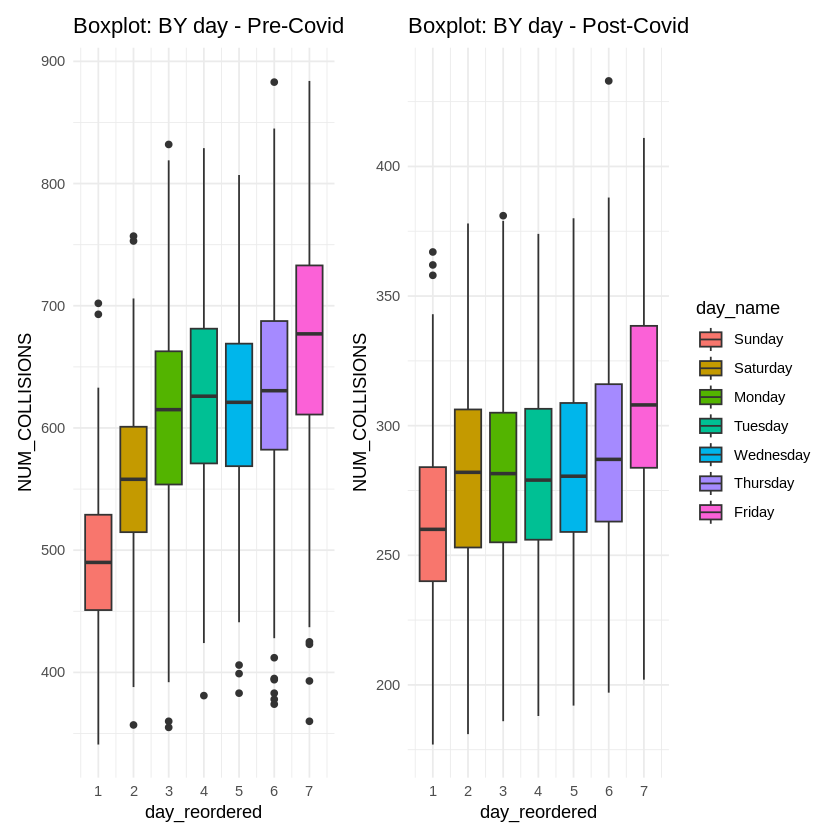

In [22]:
# Day of the week could have linear relationship if Sunday/saturday is rearanged
# Re-order days
# Define the order of the days of the week
day_order2 <- c("Sunday","Saturday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday" )

# Create the Pre-Covid plot with rearranged ordered days
collision_collated_precovid_RO <- collision_collated_precovid %>%
  mutate(day_name = factor(day_name, levels = day_order2)) %>%
  mutate(day_reordered = case_when(day == 1 ~ 3, day == 2 ~ 4, day == 3 ~ 5,
                                   day == 4 ~ 6, day == 5 ~ 7, day == 6 ~ 2,
                                   day == 7 ~ 1))

plot_precovid <- collision_collated_precovid_RO %>%
ggplot(aes(x = day_reordered, y = NUM_COLLISIONS, fill = day_name)) +
  geom_boxplot() +
  labs(title = "Boxplot: BY day - Pre-Covid") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(1, 7, 1))+
  theme(legend.position = "none") #+
  #theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Create the Post-Covid plot with rearrangedordered days
collision_collated_postcovid_RO <- collision_collated_postcovid %>%
 mutate(day_name = factor(day_name, levels = day_order2))  %>%
mutate(day_reordered = case_when(day == 1 ~ 3, day == 2 ~ 4, day == 3 ~ 5,
                                   day == 4 ~ 6, day == 5 ~ 7, day == 6 ~ 2,
                                   day == 7 ~ 1))

plot_postcovid <- collision_collated_postcovid_RO %>%
ggplot(aes(x = day_reordered, y = NUM_COLLISIONS, fill = day_name)) +
  geom_boxplot() +
  labs(title = "Boxplot: BY day - Post-Covid") +
  theme_minimal() +
  scale_x_continuous(breaks = seq(1, 7, 1))
  #theme(legend.position = "none") +
  #theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Combine the two plots using patchwork
plot_precovid + plot_postcovid

In [23]:
levels(collision_collated$day_name)
levels(collision_collated_precovid$day_name)
levels(collision_collated_postcovid$day_name)
levels(collision_collated_precovid_RO$day_name)
levels(collision_collated_postcovid_RO$day_name)

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

[1] "Sunday"    "Saturday"  "Monday"    "Tuesday"   "Wednesday" "Thursday" 
[7] "Friday"

[1] "Sunday"    "Saturday"  "Monday"    "Tuesday"   "Wednesday" "Thursday" 
[7] "Friday"

## Results

### Correlation between variables

Following Correlation matrices identifies relationships between numeric variables in the reordered Pre/post-COVID dataset. Strong correlations (positive or negative) can provide insights into potential dependencies or interactions between variables, which may inform further analysis or modeling efforts.

**All of our previous efforts, such as reordering the days and normalizing NUM_COLLISIONS, should be reflected here. Let’s take a closer look.**



#### Correlation matrix ( Pre covid)


Let’s focus on the relationship between **day** and **NUM_COLLISIONS**. Initially, day and NUM_COLLISIONS have a weak negative correlation of **-0.32**, indicating only a slight inverse relationship between the day of the week and collision counts. However, by **reordering** the days to place Sunday and Saturday first (weekend days) and weekdays sequentially, the correlation improves significantly to a positive moderate correlation of **0.52**. This reordering helps align the day variable with the observed collision patterns, smoothing out the relationship. Additionally, **normalizing** the NUM_COLLISIONS further strengthens the correlation with the reordered days (day_reordered), increasing it to a positive **0.55**.

There are other very weak correlations observed between NUM_COLLISIONS_norm and weather variables, such as dewp (**dew point**) at 0.21, temp (**temperature**) at 0.22, and similarly weak correlations with max and min temperatures, as well as mo (**month**) at 0.19. These suggest that while weather conditions might have some influence on collision counts, the relationship is not particularly strong.

Additionally, we observe collinear features among weather variables, as expected. For instance, temp (temperature) is strongly positively correlated with both max and min temperatures, reflecting their inherent dependence. Similarly, temp and dewp (dew point) appear to be collinear, likely due to their close association in measuring atmospheric conditions.

Although certain weather elements are correlated with each other to varying degrees, we will focus only on features that show a meaningful correlation with NUM_COLLISIONS_norm for the purpose of our analysis, as they are directly relevant to understanding the factors influencing collision counts.

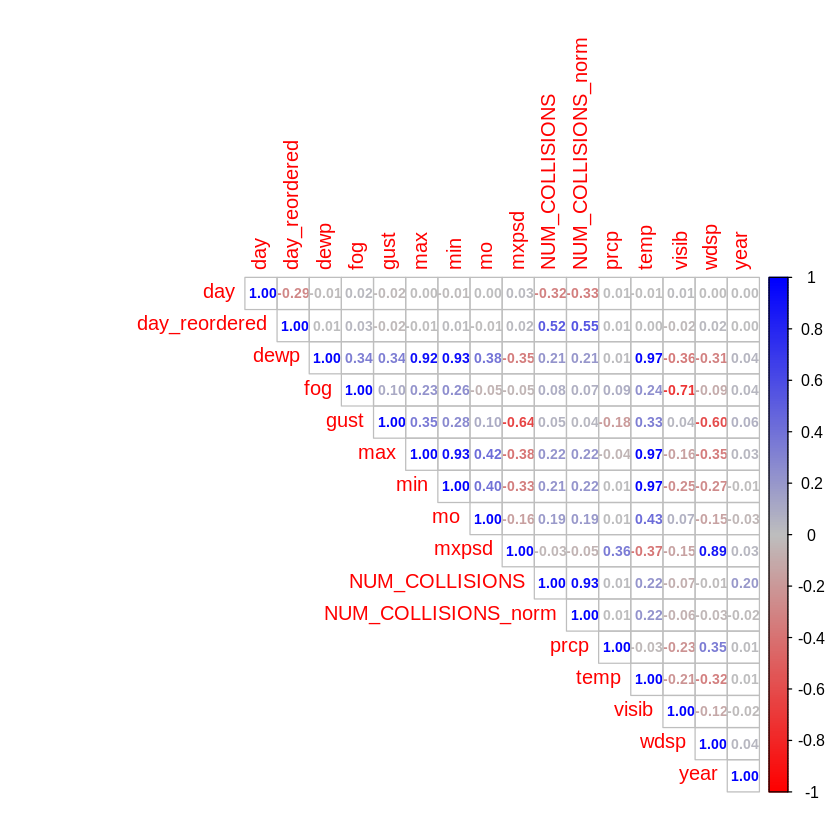

In [24]:
# Correlation matrix ( Pre covid) reordered
collision_collated_precovid_RO %>%
  select(-wban, -stn, -NUM_COLLISIONS_max_year, -NUM_COLLISIONS_min_year, -da, -slp, -sndp) %>%
  select(where(is.numeric)) %>%
  cor() %>%
  corrplot(method = 'number',
           type='upper',
           number.cex = 0.7,
           col = colorRampPalette(c("red", "grey", "blue"))(200),
           order = 'alphabet')

In [25]:
cor(collision_collated_precovid_RO$day_reordered,collision_collated_precovid_RO$NUM_COLLISIONS)
cor(collision_collated_postcovid_RO$day_reordered,collision_collated_postcovid_RO$NUM_COLLISIONS)

[1] 0.520985

[1] 0.2811691

#### Correlation matrix (Post covid)

In the **post-COVID** data, the effect of reordering the days and normalizing NUM_COLLISIONS is also evident, as the correlation between day_reordered and NUM_COLLISIONS_norm improves. However, despite this improvement, the correlation only reaches a weak positive value of **0.31 at best**. Similarly, as in the pre-COVID data, we observe weak correlations between NUM_COLLISIONS_norm and weather variables such as temperature, dew point, and month. These findings suggest that while some relationships exist, the influence of these factors on collision counts remains relatively weak in the post-COVID context.

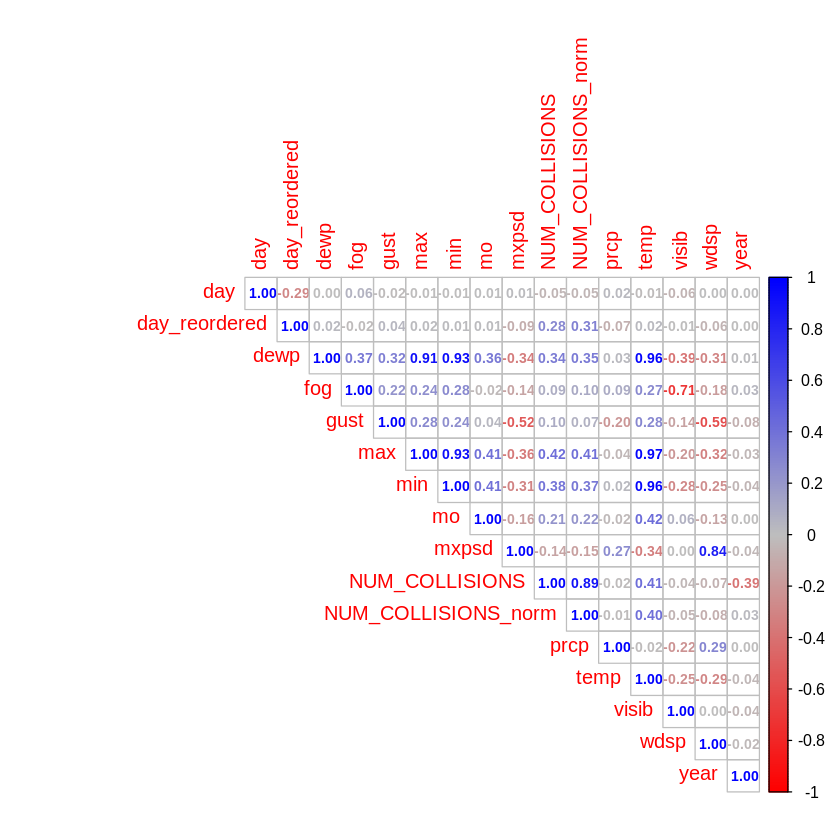

In [26]:
# Correlation matrix ( Post covid) reordered
collision_collated_postcovid_RO %>%
  select(-wban, -stn, -NUM_COLLISIONS_max_year, -NUM_COLLISIONS_min_year, -da, -slp, -sndp) %>%
  select(where(is.numeric)) %>%
  cor() %>%
  corrplot(method = 'number',
           type='upper',
           number.cex = 0.7,
           col = colorRampPalette(c("red", "grey", "blue"))(200),
           order = 'alphabet')

### Pairwise relationships, including trends

Next, a detailed exploration of pairwise relationships between the variables previously discussed—such as day reordered, temperature, dew point, month, and the number of collisions (normalized) is conducted, focusing on trends, distributions, and visual patterns. The primary purpose of ggpairs() is to visually explore these pairwise relationships in a multivariate dataset. It helps identify strong or weak correlations, detect patterns, clusters, or outliers, and provides a quick overview of variable distributions and interactions by combining scatterplots, histograms, and correlation coefficients into a single comprehensive grid.

Both Pre/Post covid COLLISIONS exhibits weak positive correlations with variables such as mo (month), temp (temperature), and dewp (dew point), though no clear linear pattern is visible in the scatterplots. In contrast, other weather-related variables, such as prcp (precipitation) and fog, show negligible influence on collision counts.

We can observe a curved seasonal variation in mo, temp, and dewp, reflecting expected trends tied to seasonal weather changes. Additionally, there is notable variability in the number of collisions (normalized) and day_reordered. However, an almost perfect linear relationship is evident between temp (temperature) and dewp (dew point), highlighting their strong collinearity.

#### Pairplot ( Pre covid)

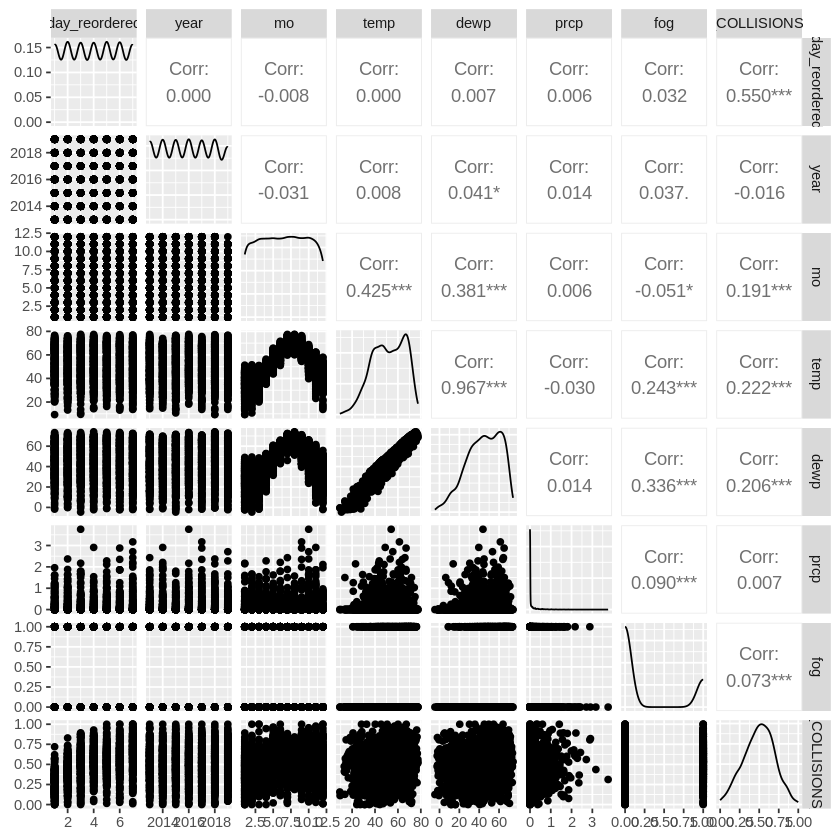

In [27]:
# see comments above
# ignore the warning below

collision_collated_precovid_RO %>%
  select(
#day,
day_reordered,
year,
mo,
#da,
temp,
dewp,#
#slp,#
#visib,
#wdsp,#
#mxpsd,#
#gust,#
#max  ,
#min   ,
prcp  ,#
#sndp  ,#
fog   ,#
NUM_COLLISIONS_norm  ) %>%
  ggpairs()


#### Pairplot ( post covid)

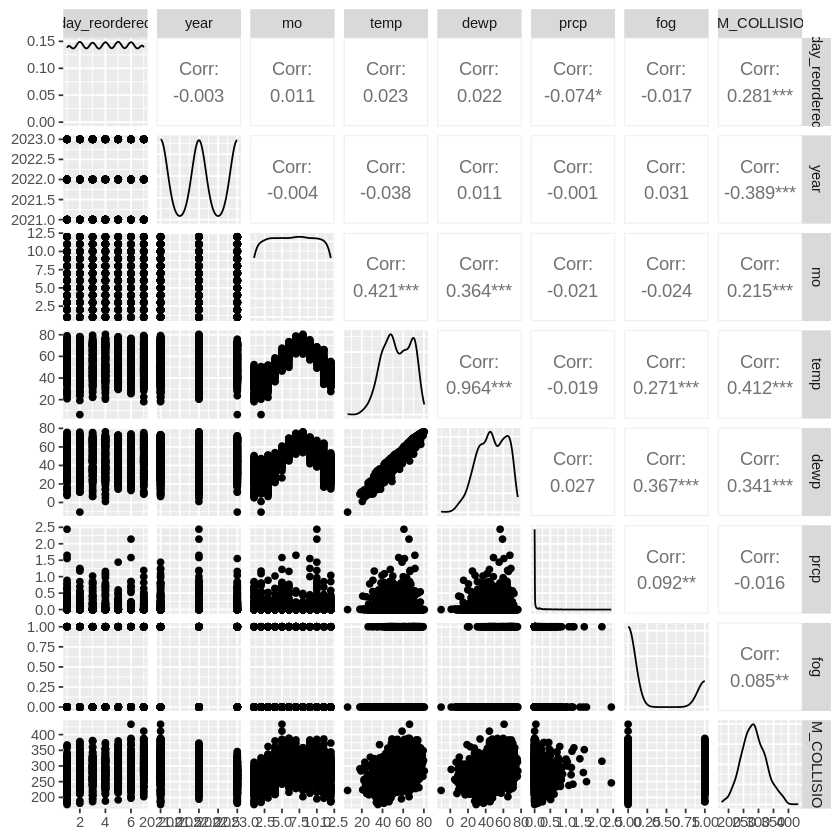

In [28]:
# see comments above
# ignore the warning below
collision_collated_postcovid_RO %>%
  select(
#day,
day_reordered,
year,
mo,
#da,
temp,
dewp,#
#slp,#
#visib,
#wdsp,#
#mxpsd,#
#gust,#
#max  ,
#min   ,
prcp  ,#
#sndp  ,#
fog   ,#
NUM_COLLISIONS  ) %>%
  ggpairs()


### Exporting data for Linear Regression Model

The following selected variables are exported for use in the linear regression model. Not all variables will be included; instead, variables will be chosen based on their relationships with the target variable, and collinear features will be excluded.

Pre-covid and post-covid data is separated in two files.

In [29]:
# Data for linear regressor
# Write data - precovid
collision_collated_precovid_RO %>%
select (day_reordered,temp,dewp,prcp,fog,NUM_COLLISIONS,NUM_COLLISIONS_norm) %>%
write.csv(, file="/content/assignment2lineardata_precovid.csv")

# Write data - postcovid
collision_collated_postcovid_RO %>%
select (day_reordered,temp,dewp,prcp,fog,NUM_COLLISIONS,NUM_COLLISIONS_norm) %>%
write.csv(, file="/content/assignment2lineardata_postcovid.csv")

### Exporting data for Deep Neural Network regression model

**One-hot encoding** is used in deep neural network regressions to effectively handle categorical variables by transforming them into binary numeric representations. This avoids the misinterpretation of categories as having a numerical order or magnitude, ensuring that variables like month or day of the week are treated as distinct, unrelated entities. Neural networks require numerical inputs, and one-hot encoding provides a format that the model can process while preventing biases that could arise from assigning numerical values directly to categories. Additionally, it allows the network to capture specific relationships between categories and the target variable, enhancing flexibility and ensuring the model learns patterns without imposing artificial assumptions.

In [30]:
# Data for DNN
# Changing day name from factor to char
collision_collated_precovid_RO$day_reordered <- as.character(collision_collated_precovid_RO$day_reordered)
collision_collated_postcovid_RO$day_reordered <- as.character(collision_collated_postcovid_RO$day_reordered)


In [31]:
# apply one-hot encoding on Month
header_names <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")
months_precovid<-model.matrix(~0+collision_collated_precovid_RO$motxt)
colnames(months_precovid) <- header_names
head(months_precovid)

months_postcovid<-model.matrix(~0+collision_collated_postcovid_RO$motxt)
colnames(months_postcovid) <- header_names
head(months_postcovid)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
# apply one-hot encoding on day of the week
header_names_day <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")
daysofweek_precovid<-model.matrix(~0+collision_collated_precovid_RO$day_reordered)
colnames(daysofweek_precovid) <- header_names_day
head(daysofweek_precovid)

daysofweek_postcovid<-model.matrix(~0+collision_collated_postcovid_RO$day_reordered)
colnames(daysofweek_postcovid) <- header_names_day
head(daysofweek_postcovid)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,1,0,0,0,0


,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,1,0,0,0,0


In [33]:
#Precovid
assignment2dnndata_precovid <- data.frame(
  months_precovid,
  daysofweek_precovid,
  collision_collated_precovid_RO$year,
  collision_collated_precovid_RO$temp,
  collision_collated_precovid_RO$dewp,
  collision_collated_precovid_RO$prcp,
  collision_collated_precovid_RO$fog,
  collision_collated_precovid_RO$NUM_COLLISIONS,
  collision_collated_precovid_RO$NUM_COLLISIONS_norm
)
# rename
colnames(assignment2dnndata_precovid) <- c(
  colnames(months_precovid),
  colnames(daysofweek_precovid),
  "year", "temp", "dewp", "prcp", "fog", "NUM_COLLISIONS", "NUM_COLLISIONS_norm"
)

head(assignment2dnndata_precovid)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Thu,Tue,Wed,year,temp,dewp,prcp,fog,NUM_COLLISIONS,NUM_COLLISIONS_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,2018,68.7,67.9,0.00,1,719,0.6597938
2,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,2018,42.2,39.7,0.22,0,689,0.5979381
3,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,2018,37.8,34.5,0.38,0,616,0.4474227
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,2018,65.6,62.6,0.00,1,673,0.5649485
5,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,2018,53.0,49.7,0.48,0,695,0.6103093
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,2018,57.4,50.3,0.00,0,594,0.4020619


In [34]:
#Post covid
assignment2dnndata_postcovid <- data.frame(
  months_postcovid,
  daysofweek_postcovid,
  collision_collated_postcovid_RO$year,
  collision_collated_postcovid_RO$temp,
  collision_collated_postcovid_RO$dewp,
  collision_collated_postcovid_RO$prcp,
  collision_collated_postcovid_RO$fog,
  collision_collated_postcovid_RO$NUM_COLLISIONS,
  collision_collated_postcovid_RO$NUM_COLLISIONS_norm
)
# rename
colnames(assignment2dnndata_postcovid) <- c(
  colnames(months_postcovid),
  colnames(daysofweek_postcovid),
  "year", "temp", "dewp", "prcp", "fog", "NUM_COLLISIONS", "NUM_COLLISIONS_norm"
)

head(assignment2dnndata_postcovid)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Thu,Tue,Wed,year,temp,dewp,prcp,fog,NUM_COLLISIONS,NUM_COLLISIONS_norm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,2022,69.7,62.5,0.00,0,241,0.2625698
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,2022,70.2,62.0,0.00,0,254,0.3351955
3,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,2023,65.6,65.1,0.00,1,264,0.5030303
4,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,2023,36.2,33.0,0.39,0,217,0.2181818
5,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,2023,41.1,35.0,0.00,0,242,0.3696970
6,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,2022,63.2,52.3,0.00,0,311,0.6536313


In [35]:
# Data for DNN
# Write data - precovid
assignment2dnndata_precovid %>%
write.csv(, file="/content/assignment2dnndata_precovid.csv")

# Write data - postcovid
assignment2dnndata_postcovid %>%
write.csv(, file="/content/assignment2dnndata_postcovid.csv")

### Github repository

In [36]:
# kedar github
# https://github.com/13023077uhi/13023077_DataAnalytics

# course github
# https://github.com/1122131uhi/dataAnalytics/blob/master/Tutorial_2a.ipynb


## Conclusion

**For linear regression**, the variables chosen demonstrates moderate linear relationships with the target variable  NUM_COLLISIONS_norm while avoiding multicollinearity. Key variables include day_reordered, which improved the correlation with NUM_COLLISIONS to a moderate positive level (0.52), and temp (temperature), which, despite a weak correlation (0.22), reflects seasonal effects on collision counts. However, variables that are strongly collinear, such as temp and dewp (dew point), should not be included together, as linear regression is sensitive to multicollinearity, which can distort coefficient estimates and reduce interpretability. Additionally, weather variables like prcp (precipitation) and fog, which show negligible correlations, may not significantly contribute to the model and can be excluded.

<br>

**For deep neural networks (DNNs)**, a broader set of variables are utilized, as DNNs excel at modeling non-linear relationships and interactions. Included one-hot encoded categorical variables such as day_reordered (days of the week) and mo (month), which will allow the model to learn distinct patterns for each category without assuming an ordinal relationship. All weather-related variables, including temp, dewp, prcp, and fog, is  included, as even weak correlations may provide valuable input to the network. Additionally, normalized variables like NUM_COLLISIONS_norm ensure consistent scaling for efficient training. Unlike linear regression, DNNs are not sensitive to multicollinearity, so collinear features like temp and dewp can both be included, as they might capture complementary patterns.

These datasets to be used in regression models in assignment 2a and 2b.